# Research topics in Data Mining

little introduction here

## Read and preprocess the data

In [10]:
import sys
sys.path.append("..")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from src.preprocess import read_data
from src.visualization import plot_feature_importance, plot_correlation_matrix, plot_distribution


CSV_FILE = "../data/data.csv"


X, y = read_data(CSV_FILE)
X.head()
y.head()

Dropping 21 columns...
DataFrame shape: (569, 12)
Label distribution:
0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Implement missing data functions

## ML model pipeline for classification

In [2]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.7)

In [3]:
from src.model import train

rf = train(X_train, y_train)

In [4]:
pred = rf.predict(X_test)

## Evaluate somehow our results

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [6]:
import pandas as pd

feature_scores = pd.Series(rf["rf"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

concave points_mean       0.310279
perimeter_mean            0.161415
area_mean                 0.150901
radius_mean               0.144392
concavity_mean            0.133058
compactness_mean          0.041738
texture_mean              0.031813
smoothness_mean           0.013322
fractal_dimension_mean    0.006805
symmetry_mean             0.006277
dtype: float64

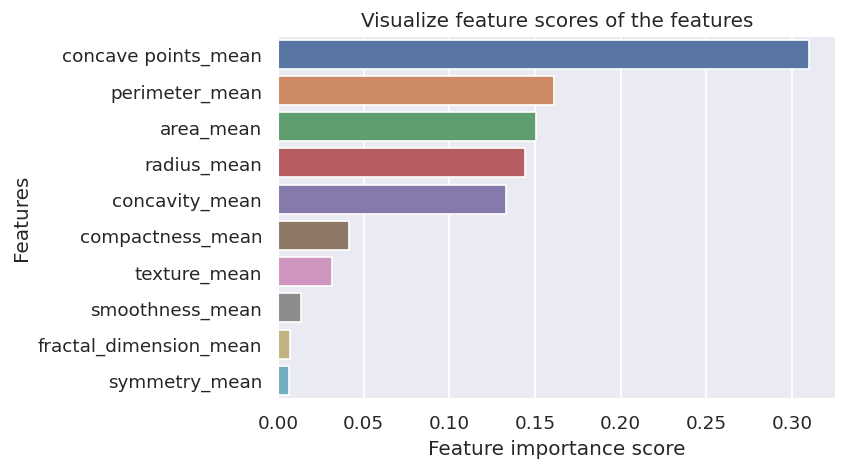

In [7]:
plot_feature_importance(feature_scores)

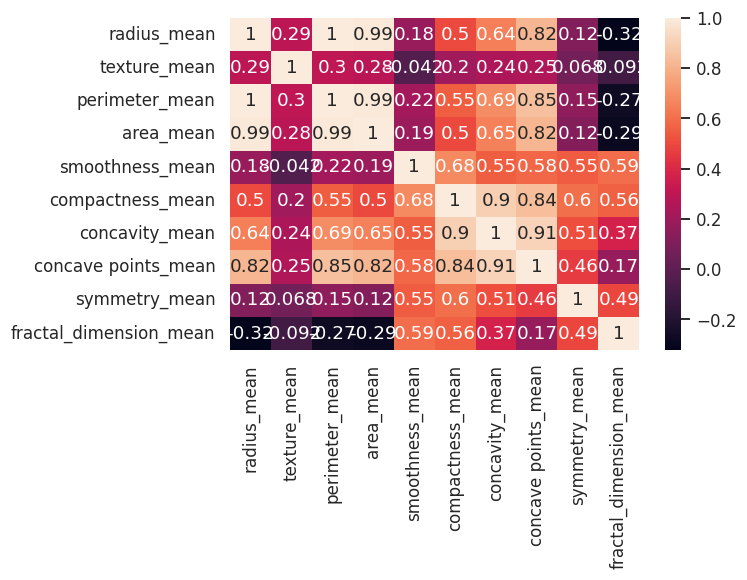

In [8]:
plot_correlation_matrix(X_train)

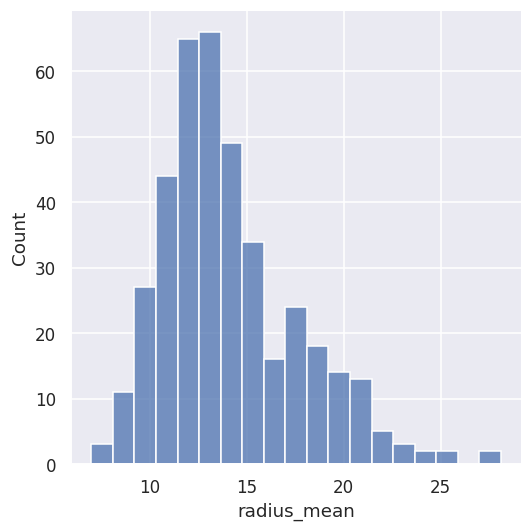

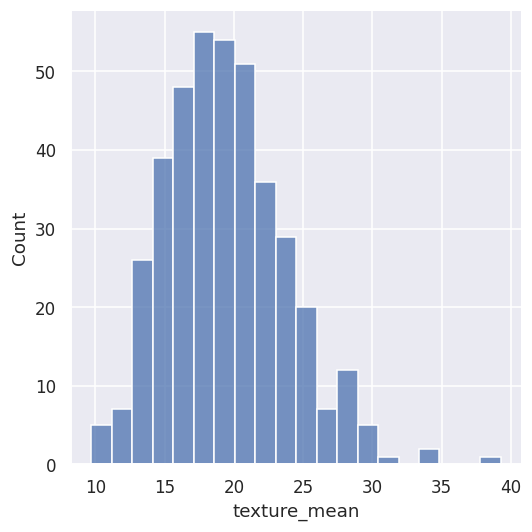

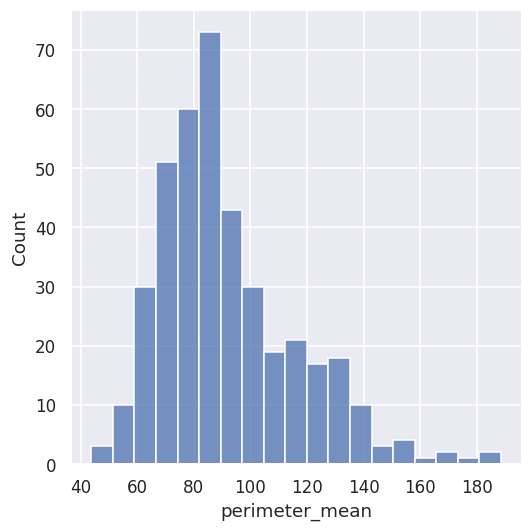

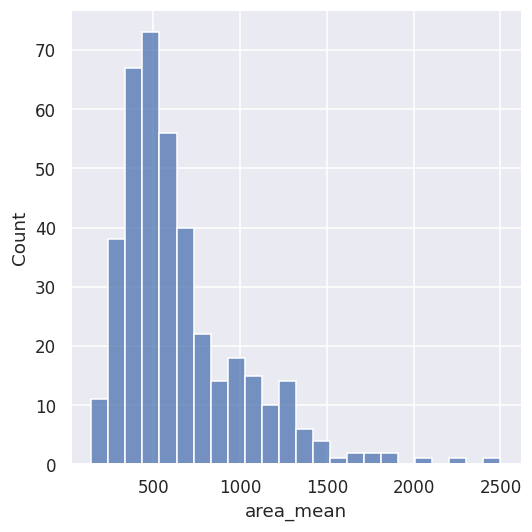

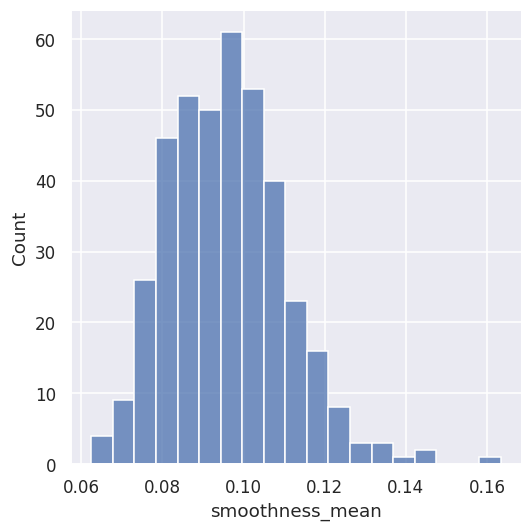

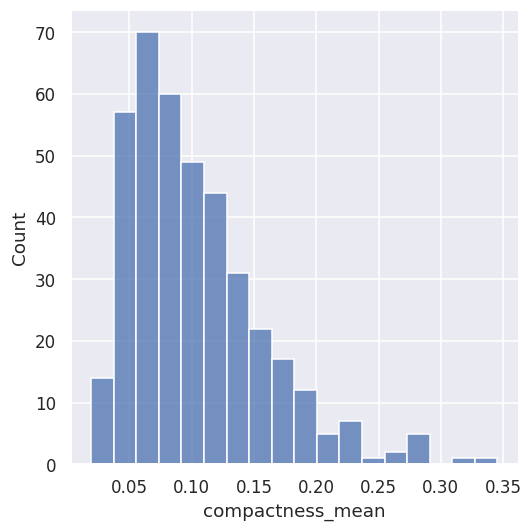

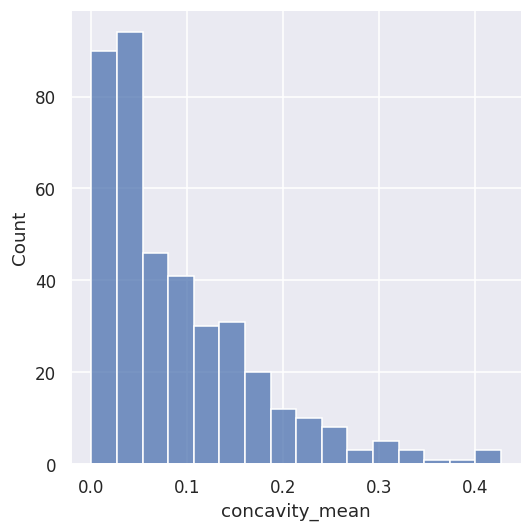

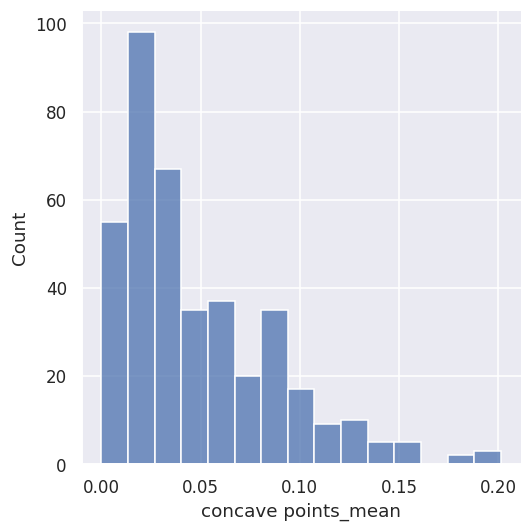

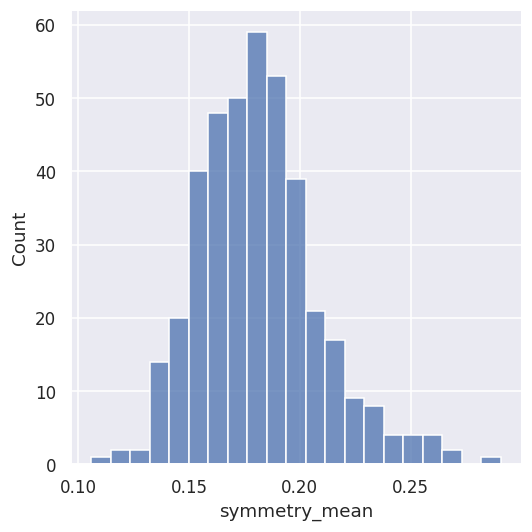

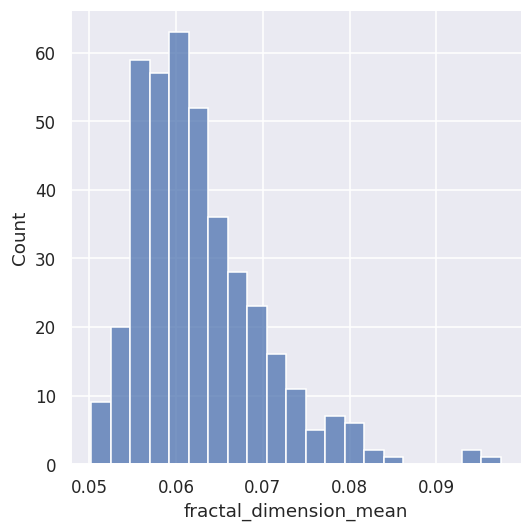

In [9]:
for col in X_train:
    plot_distribution(X_train[col])